In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/content/clinical_notes.csv')

In [3]:
df

,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma,use
0,56.56,female,black,non-hispanic,english,single,ms. PERSON is a 56 yo woman presenting to esta...,The 56 y/o female patient has optic nerve head...,yes,training
1,53.91,female,white,non-hispanic,english,single,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...,yes,training
2,46.30,female,white,non-hispanic,english,single,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ...",no,training
3,66.52,male,white,non-hispanic,english,single,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...,yes,training
4,82.52,female,black,non-hispanic,english,divorced,in step. os with nonspecific peripheral defect...,The patient has nonspecific peripheral defects...,yes,training
...,...,...,...,...,...,...,...,...,...,...
9995,84.71,female,white,non-hispanic,english,married or partnered,"than or equal to 17 mmhg, right eye. -goal int...","Patient has glaucoma, with right eye (OD) intr...",yes,test
9996,40.32,male,white,non-hispanic,english,married or partnered,40 y/o male who presents DATE_TIME for iop che...,"40 y/o male, suspect for glaucoma due to enlar...",no,test
9997,57.58,male,black,non-hispanic,english,married or partnered,"57 URLleh/o glaucoma suspect, presents for gla...",57-year-old patient suspected of glaucoma unde...,no,test
9998,73.03,female,white,non-hispanic,english,married or partnered,imp: doing well with pciol ou (toric os) pvd o...,"Patient has pciol ou, toric os, pvd ou, and cu...",no,test


In [ ]:
df.isnull().sum()

age              0
gender           0
race             0
ethnicity        0
language         0
maritalstatus    0
note             0
gpt4_summary     0
glaucoma         0
use              0
dtype: int64

In [ ]:
df['gender'].value_counts()

gender
female    5631
male      4369
Name: count, dtype: int64

In [ ]:
df['race'].value_counts()

race
white    7690
black    1491
asian     819
Name: count, dtype: int64

In [ ]:
df['ethnicity'].value_counts()

ethnicity
non-hispanic    9062
unknown          540
hispanic         398
Name: count, dtype: int64

In [ ]:
df['language'].value_counts()

language
english    9250
unknown     498
spanish     176
other        76
Name: count, dtype: int64

In [ ]:
df['maritalstatus'].value_counts()

maritalstatus
married or partnered    5739
single                  2637
divorced                 662
widowed                  614
unknown                  251
legally separated         97
Name: count, dtype: int64

In [ ]:
df['use'].value_counts()

use
training      7000
test          2000
validation    1000
Name: count, dtype: int64

In [ ]:
df[:7000]['use'].value_counts()

use
training    7000
Name: count, dtype: int64

In [ ]:
df[7000:8000]['use'].value_counts()

use
validation    1000
Name: count, dtype: int64

In [ ]:
df[8000:10000]['use'].value_counts()

use
test    2000
Name: count, dtype: int64

In [4]:
df = df.drop('use', axis=1)

In [5]:
train = df[:7000]
val = df[7000:8000]
test = df[8000:10000]

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#!pip install nltk
!pip install fasttext

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp38-cp38-linux_x86_64.whl size=4746288 sha256=86e0de334c9df804049d51446dfdd8abbd41130374cef7d041686908d22c5cbf
  Stored in directory: /home/mustakin/.cache/pip/wheels/7b/ab/44/06c2149a045ffb2a91d61aaea452674d2e70f00d51de699414
Successfully built fasttext


# Overall

## Baseline

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load and preprocess data using only GPT4 summary
def load_and_preprocess_data(train, test):
    # Read the CSV file

    # Use GPT4 summary as feature
    X_train = train['gpt4_summary']
    X_test = test['gpt4_summary']
    y_train = train['glaucoma']
    y_test = test['glaucoma']



    return X_train, X_test, y_train, y_test

# Create a machine learning pipeline with TF-IDF and Logistic Regression
def create_classification_pipeline():
    return Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),  # TF-IDF Vectorization
        ('classifier', MultinomialNB())  # Logistic Regression
    ])

# Main function to run the classification
def run_glaucoma_classification(train, test):
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess_data(train, test)


    # Create and train the pipeline
    pipeline = create_classification_pipeline()
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Compute probabilities for AUC
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Compute AUC
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
        print("AUC Score:", auc)
    except ValueError:
        print("AUC calculation failed. Ensure binary classification.")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot ROC Curve
    try:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    except Exception as e:
        print("Could not plot ROC curve:", str(e))

    return pipeline

# Run the classification
model = run_glaucoma_classification(train, test)



Accuracy Score: 0.7055
AUC Score: 0.7607714480960428

Classification Report:
              precision    recall  f1-score   support

          no       0.70      0.69      0.69       977
         yes       0.71      0.72      0.72      1023

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000


Confusion Matrix:
[[671 306]
 [283 740]]
Could not plot ROC curve: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.


## LSTM

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipykernel_505023/2828674772.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['combin

Using device: cpu


/tmp/ipykernel_505023/2828674772.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['processed_text'] = train['combined_text'].apply(preprocess_text)
/tmp/ipykernel_505023/2828674772.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['processed_text'] = val['combined_text'].apply(preprocess_text)
/tmp/ipykernel_505023/2828674772.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Epoch [1/50]
Train Loss: 0.6933, Train Acc: 0.5079
Val Loss: 0.6924, Val Acc: 0.5210
Epoch [2/50]
Train Loss: 0.6920, Train Acc: 0.5086
Val Loss: 0.6922, Val Acc: 0.5140
Epoch [3/50]
Train Loss: 0.6909, Train Acc: 0.5156
Val Loss: 0.6916, Val Acc: 0.5140
Epoch [4/50]
Train Loss: 0.6885, Train Acc: 0.5196
Val Loss: 0.6925, Val Acc: 0.5290
Epoch [5/50]
Train Loss: 0.6884, Train Acc: 0.5241
Val Loss: 0.6910, Val Acc: 0.5230
Epoch [6/50]
Train Loss: 0.6844, Train Acc: 0.5296
Val Loss: 0.7047, Val Acc: 0.5190
Epoch [7/50]
Train Loss: 0.6796, Train Acc: 0.5297
Val Loss: 0.6977, Val Acc: 0.5000
Epoch [8/50]
Train Loss: 0.6809, Train Acc: 0.5279
Val Loss: 0.6966, Val Acc: 0.5380
Epoch [9/50]
Train Loss: 0.6740, Train Acc: 0.5330
Val Loss: 0.6902, Val Acc: 0.5370
Epoch [10/50]
Train Loss: 0.6669, Train Acc: 0.5446
Val Loss: 0.7029, Val Acc: 0.5370
Epoch [11/50]
Train Loss: 0.6700, Train Acc: 0.5419
Val Loss: 0.7018, Val Acc: 0.5250
Epoch [12/50]
Train Loss: 0.6608, Train Acc: 0.5397
Val Loss: 0

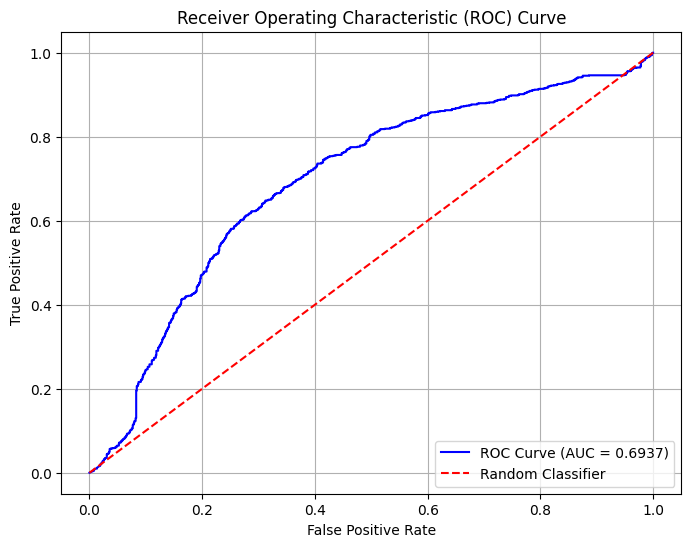

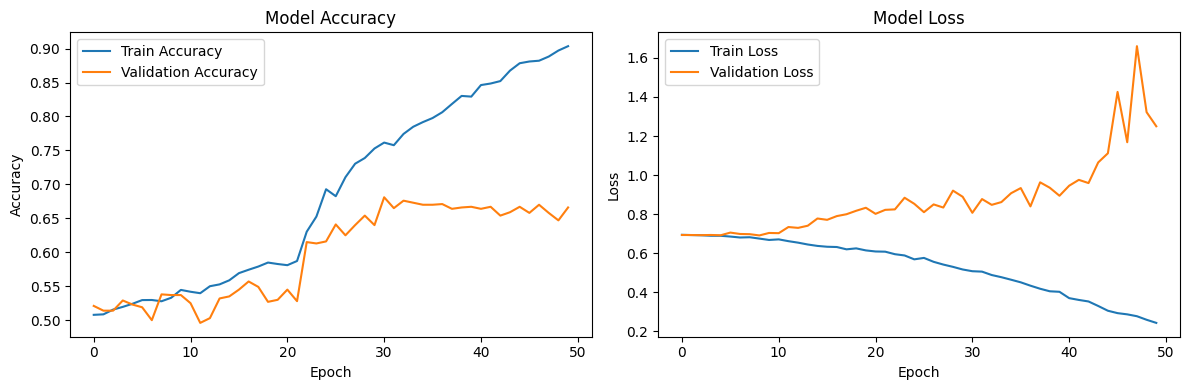

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class LSTMGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)

        # Take the last time step
        out = lstm_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                # Compute validation accuracy
                predicted = (outputs.squeeze() > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.squeeze().cpu().numpy()
            predicted = (probs > 0.5).astype(int)

            all_preds.extend(predicted)
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs)

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

    # Preprocess text
    train['combined_text'] = train['note'] + ' ' + train['gpt4_summary']
    val['combined_text'] = val['note'] + ' ' + val['gpt4_summary']
    test['combined_text'] = test['note'] + ' ' + test['gpt4_summary']

    train['processed_text'] = train['combined_text'].apply(preprocess_text)
    val['processed_text'] = val['combined_text'].apply(preprocess_text)
    test['processed_text'] = test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(train['processed_text'].values, ft_model)
    X_val = create_embeddings(val['processed_text'].values, ft_model)
    X_test = create_embeddings(test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(train['glaucoma'])

    y_train = le.transform(train['glaucoma'])
    y_val = le.transform(val['glaucoma'])
    y_test = le.transform(test['glaucoma'])

    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = LSTMGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_lstm_model.pth')

if __name__ == "__main__":
    main()

In [1]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=6f9dfe5047d1dbda40bc80e9a1906aefb63946e87d42719e53100eacb0c21e4f
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchsummary
import torchview

class LSTMGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)

        # Take the last time step
        out = lstm_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def visualize_model():
    # Model initialization
    input_size = 300  # Example input size
    hidden_size = 128
    num_layers = 2
    output_size = 1

    model = LSTMGlaucomaClassifier(
        input_size=input_size,
        hidden_size=hidden_size,
        num_layers=num_layers,
        output_size=output_size
    )

    # 1. Print model summary
    print("Model Architecture Summary:")
    print(model)

    # 2. Model parameters visualization
    print("\nModel Parameters:")
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"Total Parameters: {total_params}")
    print(f"Trainable Parameters: {trainable_params}")

    # 3. Layer parameter details
    print("\nLayer-wise Parameter Details:")
    for name, param in model.named_parameters():
        print(f"{name}: {param.shape}")

    # 4. Computational Graph Visualization
    try:
        # Create a sample input tensor
        batch_size = 32
        sequence_length = 10
        x = torch.randn(batch_size, sequence_length, input_size)

        # Use torchview to generate model graph
        model_graph = torchview.draw_graph(
            model,
            input_data=x,
            save_graph=True,
            filename='lstm_glaucoma_classifier_graph',
            directory='.'
        )
        print("\nComputational graph saved as 'lstm_glaucoma_classifier_graph.png'")
    except ImportError:
        print("\nTorchview not available. Install via 'pip install torchview' for graph visualization.")

if __name__ == "__main__":
    visualize_model()

Model Architecture Summary:
LSTMGlaucomaClassifier(
  (lstm): LSTM(300, 128, num_layers=2, batch_first=True, dropout=0.3)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Model Parameters:
Total Parameters: 360577
Trainable Parameters: 360577

Layer-wise Parameter Details:
lstm.weight_ih_l0: torch.Size([512, 300])
lstm.weight_hh_l0: torch.Size([512, 128])
lstm.bias_ih_l0: torch.Size([512])
lstm.bias_hh_l0: torch.Size([512])
lstm.weight_ih_l1: torch.Size([512, 128])
lstm.weight_hh_l1: torch.Size([512, 128])
lstm.bias_ih_l1: torch.Size([512])
lstm.bias_hh_l1: torch.Size([512])
fc1.weight: torch.Size([64, 128])
fc1.bias: torch.Size([64])
fc2.weight: torch.Size([1, 64])
fc2.bias: torch.Size([1])

Computational graph saved as 'lstm_glaucoma_classifier_graph.png'


## GRU

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipykernel_505023/1362856212.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['combin

Using device: cpu


/tmp/ipykernel_505023/1362856212.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['processed_text'] = train['combined_text'].apply(preprocess_text)
/tmp/ipykernel_505023/1362856212.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['processed_text'] = val['combined_text'].apply(preprocess_text)
/tmp/ipykernel_505023/1362856212.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Epoch [1/50]
Train Loss: 0.6926, Train Acc: 0.5061
Val Loss: 0.6935, Val Acc: 0.4900
Epoch [2/50]
Train Loss: 0.6915, Train Acc: 0.4990
Val Loss: 0.6927, Val Acc: 0.5230
Epoch [3/50]
Train Loss: 0.6891, Train Acc: 0.5144
Val Loss: 0.6938, Val Acc: 0.5170
Epoch [4/50]
Train Loss: 0.6856, Train Acc: 0.5276
Val Loss: 0.6905, Val Acc: 0.5280
Epoch [5/50]
Train Loss: 0.6824, Train Acc: 0.5307
Val Loss: 0.7003, Val Acc: 0.5170
Epoch [6/50]
Train Loss: 0.6785, Train Acc: 0.5249
Val Loss: 0.6907, Val Acc: 0.5410
Epoch [7/50]
Train Loss: 0.6721, Train Acc: 0.5277
Val Loss: 0.7115, Val Acc: 0.5230
Epoch [8/50]
Train Loss: 0.6696, Train Acc: 0.5344
Val Loss: 0.7126, Val Acc: 0.5150
Epoch [9/50]
Train Loss: 0.6590, Train Acc: 0.5463
Val Loss: 0.7065, Val Acc: 0.5380
Epoch [10/50]
Train Loss: 0.6483, Train Acc: 0.5560
Val Loss: 0.7366, Val Acc: 0.5420
Epoch [11/50]
Train Loss: 0.6463, Train Acc: 0.5510
Val Loss: 0.7335, Val Acc: 0.5230
Epoch [12/50]
Train Loss: 0.6363, Train Acc: 0.5579
Val Loss: 0

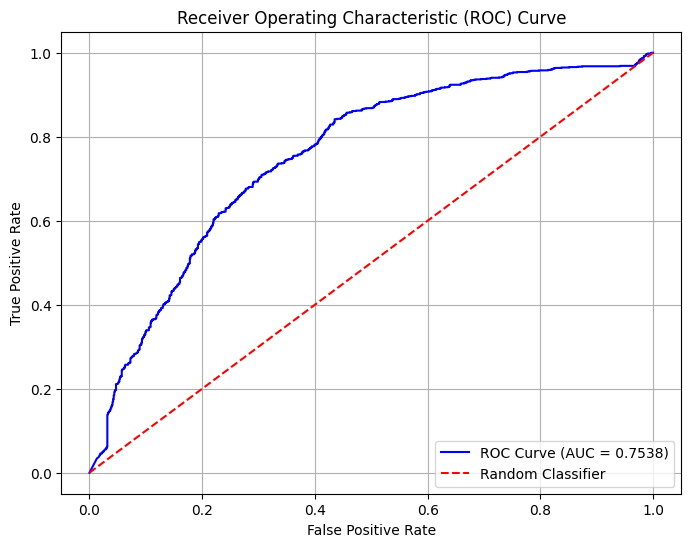

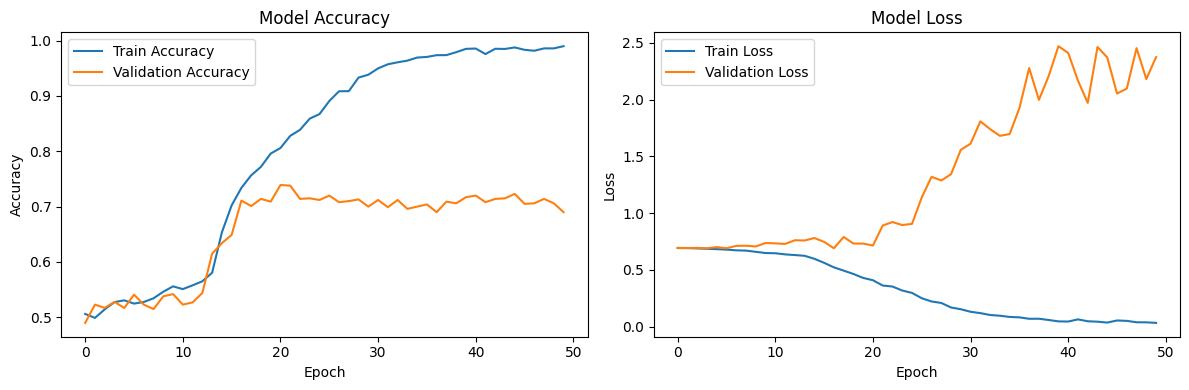

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class GRUGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layers
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # GRU forward pass
        gru_out, _ = self.gru(x)

        # Take the last time step
        out = gru_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                # Compute validation accuracy
                predicted = (outputs.squeeze() > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.squeeze().cpu().numpy()
            predicted = (probs > 0.5).astype(int)

            all_preds.extend(predicted)
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs)

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

    # Preprocess text
    train['combined_text'] = train['note'] + ' ' + train['gpt4_summary']
    val['combined_text'] = val['note'] + ' ' + val['gpt4_summary']
    test['combined_text'] = test['note'] + ' ' + test['gpt4_summary']

    train['processed_text'] = train['combined_text'].apply(preprocess_text)
    val['processed_text'] = val['combined_text'].apply(preprocess_text)
    test['processed_text'] = test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(train['processed_text'].values, ft_model)
    X_val = create_embeddings(val['processed_text'].values, ft_model)
    X_test = create_embeddings(test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(train['glaucoma'])

    y_train = le.transform(train['glaucoma'])
    y_val = le.transform(val['glaucoma'])
    y_test = le.transform(test['glaucoma'])

    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = GRUGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_gru_model.pth')

if __name__ == "__main__":
    main()

In [16]:
import torch
import torch.nn as nn
import graphviz

class GRUGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layers
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # GRU forward pass
        gru_out, _ = self.gru(x)

        # Take the last time step
        out = gru_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

def visualize_model():
    # Create a new directed graph
    dot = graphviz.Digraph(comment='GRU Glaucoma Classifier',
                            format='pdf',
                            node_attr={'shape': 'box', 'style': 'filled', 'fillcolor': 'lightblue'})

    # Set graph attributes
    dot.attr(rankdir='LR', size='12,6')  # Left to Right layout

    # Add nodes for model components
    dot.node('input', 'Input\n(300 features)', fillcolor='lightgreen')

    # GRU Layer
    dot.node('gru', f'LSTM/GRU Layer\n{300} → {128}\nLayers: 2\nDropout: 0.3', fillcolor='lightyellow')

    # Fully Connected Layers
    dot.node('fc1', 'Fully Connected Layer 1\n128 → 64\nReLU Activation', fillcolor='lightpink')
    dot.node('dropout', 'Dropout\n(0.3)', fillcolor='lightcoral')
    dot.node('fc2', 'Fully Connected Layer 2\n64 → 1\nSigmoid Activation', fillcolor='lightsalmon')

    # Output
    dot.node('output', 'Output\n(Glaucoma Probability)', fillcolor='lightgreen')

    # Add edges between nodes
    dot.edges([
        ('input', 'gru'),
        ('gru', 'fc1'),
        ('fc1', 'dropout'),
        ('dropout', 'fc2'),
        ('fc2', 'output')
    ])

    # Render the graph
    dot.render('gru_glaucoma_classifier_model_horizontal', cleanup=True)
    print("Model visualization saved as 'gru_glaucoma_classifier_model_horizontal.pdf'")

# Run the visualization
if __name__ == '__main__':
    visualize_model()

Model visualization saved as 'gru_glaucoma_classifier_model_horizontal.pdf'


# Asian

In [18]:
df_group = df.groupby('race')

In [19]:
asian = df_group.get_group('asian')

In [20]:
asian

,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma,use
16,46.61,male,asian,non-hispanic,english,single,46 y.o. man with LOCATION new patient to me DA...,46-year-old man referred for glaucoma suspicio...,yes,training
52,36.67,male,asian,non-hispanic,english,single,"refer to glaucoma see me in DATE_TIME, sooner ...",The patient has been referred for glaucoma and...,no,training
64,68.13,female,asian,non-hispanic,english,married or partnered,eye. -goal intraocular pressure less than or e...,The patient has an intraocular pressure above ...,yes,training
111,70.20,female,asian,non-hispanic,english,divorced,70yo f who presents for DATE_TIME exam and con...,70-year-old female patient presents with worse...,yes,training
116,39.10,female,asian,non-hispanic,english,married or partnered,39 y.o. female returns for baseline glaucoma t...,39 y.o. female had baseline glaucoma testing. ...,no,training
...,...,...,...,...,...,...,...,...,...,...
9963,86.77,female,asian,non-hispanic,english,married or partnered,# glaucoma suspect based on cdr -- ? prior ang...,Patient suspected of glaucoma based on CDR. Ha...,yes,test
9968,71.91,female,asian,non-hispanic,english,married or partnered,"a 71 y.o. asian, non-hispanic female with no d...","71 y.o. Asian, non-Hispanic woman with no glau...",no,test
9979,59.11,male,asian,non-hispanic,unknown,single,59 y.o. NRP man referred initially by his opto...,59 y.o. male patient has moderate stage narrow...,yes,test
9989,80.28,male,asian,non-hispanic,english,married or partnered,"brimonidine, LOCATION, PERSON * this medicatio...",The note discusses various medications used to...,yes,test


In [21]:
asian['use'].value_counts()

,count
use,
training,601
test,158
validation,60


In [22]:
asian_g = asian.groupby('use')
asian_training = asian_g.get_group('training')

In [23]:
asian_training['use'].value_counts()

,count
use,
training,601


In [24]:
asian_test = asian_g.get_group('test')

In [25]:
asian_test['use'].value_counts()

,count
use,
test,158


In [26]:
asian_val = asian_g.get_group('validation')

In [27]:
asian_val['use'].value_counts()

,count
use,
validation,60


In [28]:
asian_training = asian_training.drop('use', axis=1)
asian_test = asian_test.drop('use', axis=1)
asian_val = asian_val.drop('use', axis=1)

## Baseline

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load and preprocess data using only GPT4 summary
def load_and_preprocess_data(train, test):
    # Read the CSV file

    # Use GPT4 summary as feature
    X_train = train['gpt4_summary']
    X_test = test['gpt4_summary']
    y_train = train['glaucoma']
    y_test = test['glaucoma']



    return X_train, X_test, y_train, y_test

# Create a machine learning pipeline with TF-IDF and Logistic Regression
def create_classification_pipeline():
    return Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),  # TF-IDF Vectorization
        ('classifier', MultinomialNB())  # Logistic Regression
    ])

# Main function to run the classification
def run_glaucoma_classification(train, test):
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess_data(train, test)


    # Create and train the pipeline
    pipeline = create_classification_pipeline()
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Compute probabilities for AUC
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Compute AUC
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
        print("AUC Score:", auc)
    except ValueError:
        print("AUC calculation failed. Ensure binary classification.")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot ROC Curve
    try:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    except Exception as e:
        print("Could not plot ROC curve:", str(e))

    return pipeline

# Run the classification
model = run_glaucoma_classification(asian_training, asian_test)



Accuracy Score: 0.6772151898734177
AUC Score: 0.7030924531325107

Classification Report:
              precision    recall  f1-score   support

          no       0.66      0.75      0.70        79
         yes       0.71      0.61      0.65        79

    accuracy                           0.68       158
   macro avg       0.68      0.68      0.68       158
weighted avg       0.68      0.68      0.68       158


Confusion Matrix:
[[59 20]
 [31 48]]
Could not plot ROC curve: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.


## LSTM

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Using device: cpu
Epoch [1/50]
Train Loss: 0.6924, Train Acc: 0.5241
Val Loss: 0.6941, Val Acc: 0.4667
Epoch [2/50]
Train Loss: 0.6914, Train Acc: 0.5374
Val Loss: 0.6897, Val Acc: 0.5500
Epoch [3/50]
Train Loss: 0.7188, Train Acc: 0.5691
Val Loss: 0.7284, Val Acc: 0.5333
Epoch [4/50]
Train Loss: 0.6934, Train Acc: 0.5191
Val Loss: 0.7084, Val Acc: 0.4667
Epoch [5/50]
Train Loss: 0.6945, Train Acc: 0.5208
Val Loss: 0.6955, Val Acc: 0.4667
Epoch [6/50]
Train Loss: 0.6948, Train Acc: 0.5025
Val Loss: 0.6989, Val Acc: 0.4667
Epoch [7/50]
Train Loss: 0.6920, Train Acc: 0.5175
Val Loss: 0.6963, Val Acc: 0.4667
Epoch [8/50]
Train Loss: 0.6940, Train Acc: 0.5058
Val Loss: 0.6948, Val Acc: 0.4667
Epoch [9/50]
Train Loss: 0.6925, Train Acc: 0.5125
Val Loss: 0.6982, Val Acc: 0.4667
Epoch [10/50]
Train Loss: 0.6931, Train Acc: 0.5208
Val Loss: 0.6994, Val Acc: 0.4667
Epoch [11/50]
Train Loss: 0.6928, Train Acc: 0.5208
Val Loss: 0.6971, Val Acc: 0.4667
Epoch [12/50]
Train Loss: 0.6932, Train Acc: 

/home/mustakin/anaconda3/envs/tf-gpu2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mustakin/anaconda3/envs/tf-gpu2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mustakin/anaconda3/envs/tf-gpu2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

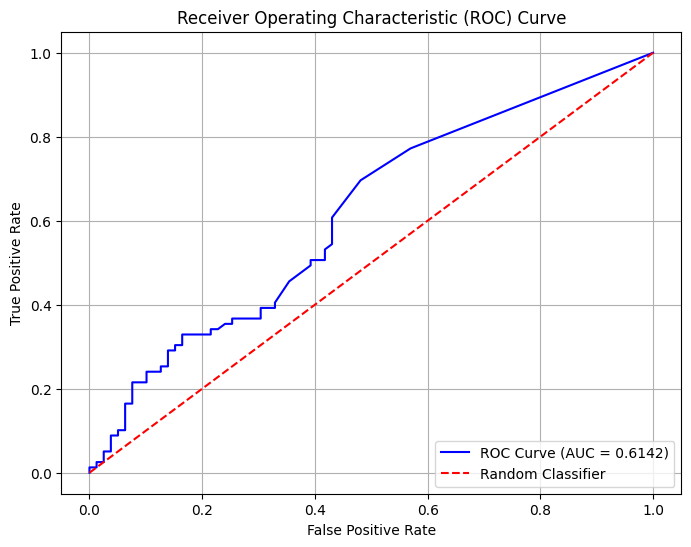

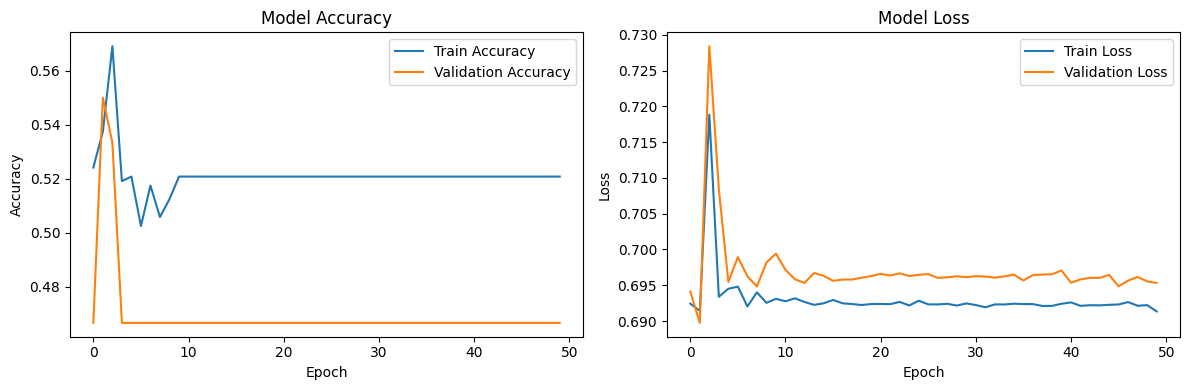

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class LSTMGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)

        # Take the last time step
        out = lstm_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                # Compute validation accuracy
                predicted = (outputs.squeeze() > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.squeeze().cpu().numpy()
            predicted = (probs > 0.5).astype(int)

            all_preds.extend(predicted)
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs)

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

     # Preprocess text
    asian_training['combined_text'] = asian_training['note'] + ' ' + asian_training['gpt4_summary']
    asian_val['combined_text'] = asian_val['note'] + ' ' + asian_val['gpt4_summary']
    asian_test['combined_text'] = asian_test['note'] + ' ' + asian_test['gpt4_summary']

    asian_training['processed_text'] = asian_training['combined_text'].apply(preprocess_text)
    asian_val['processed_text'] = asian_val['combined_text'].apply(preprocess_text)
    asian_test['processed_text'] = asian_test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(asian_training['processed_text'].values, ft_model)
    X_val = create_embeddings(asian_val['processed_text'].values, ft_model)
    X_test = create_embeddings(asian_test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(asian_training['glaucoma'])

    y_train = le.transform(asian_training['glaucoma'])
    y_val = le.transform(asian_val['glaucoma'])
    y_test = le.transform(asian_test['glaucoma'])


    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = LSTMGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_lstm_model.pth')

if __name__ == "__main__":
    main()

## GRU

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Using device: cpu
Epoch [1/50]
Train Loss: 0.6932, Train Acc: 0.4825
Val Loss: 0.6922, Val Acc: 0.5000
Epoch [2/50]
Train Loss: 0.6891, Train Acc: 0.5474
Val Loss: 0.6695, Val Acc: 0.5833
Epoch [3/50]
Train Loss: 0.6781, Train Acc: 0.5574
Val Loss: 0.6746, Val Acc: 0.5833
Epoch [4/50]
Train Loss: 0.6726, Train Acc: 0.5557
Val Loss: 0.6495, Val Acc: 0.5833
Epoch [5/50]
Train Loss: 0.6656, Train Acc: 0.5757
Val Loss: 0.6571, Val Acc: 0.5667
Epoch [6/50]
Train Loss: 0.6576, Train Acc: 0.5824
Val Loss: 0.6458, Val Acc: 0.5667
Epoch [7/50]
Train Loss: 0.6467, Train Acc: 0.5857
Val Loss: 0.6380, Val Acc: 0.5833
Epoch [8/50]
Train Loss: 0.6392, Train Acc: 0.5890
Val Loss: 0.6249, Val Acc: 0.6000
Epoch [9/50]
Train Loss: 0.6401, Train Acc: 0.5907
Val Loss: 0.6453, Val Acc: 0.5667
Epoch [10/50]
Train Loss: 0.6289, Train Acc: 0.5923
Val Loss: 0.6144, Val Acc: 0.6000
Epoch [11/50]
Train Loss: 0.6233, Train Acc: 0.5907
Val Loss: 0.6793, Val Acc: 0.5333
Epoch [12/50]
Train Loss: 0.6175, Train Acc: 

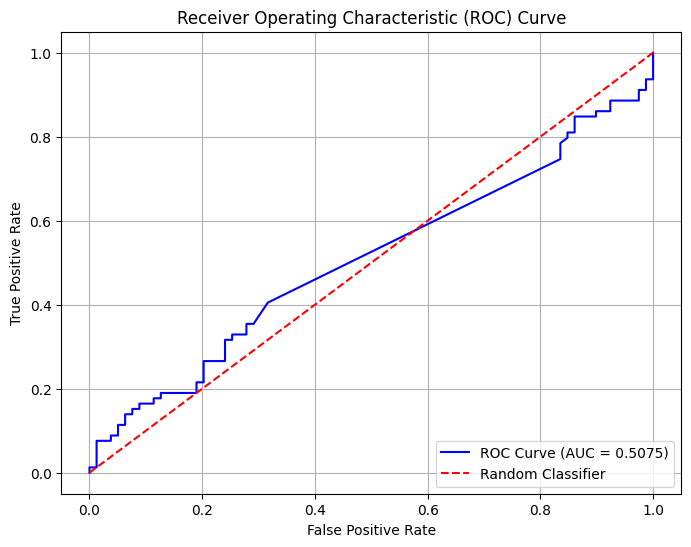

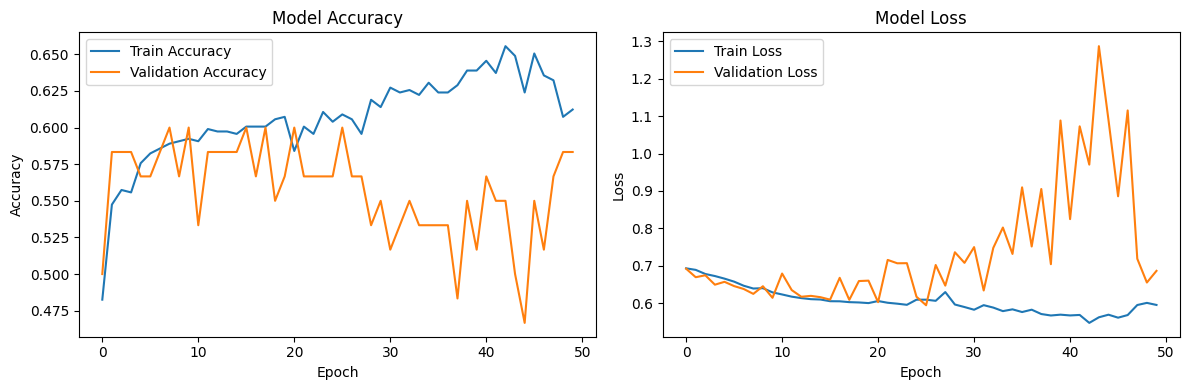

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class GRUGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layers
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # GRU forward pass
        gru_out, _ = self.gru(x)

        # Take the last time step
        out = gru_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                # Compute validation accuracy
                predicted = (outputs.squeeze() > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.squeeze().cpu().numpy()
            predicted = (probs > 0.5).astype(int)

            all_preds.extend(predicted)
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs)

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

     # Preprocess text
    asian_training['combined_text'] = asian_training['note'] + ' ' + asian_training['gpt4_summary']
    asian_val['combined_text'] = asian_val['note'] + ' ' + asian_val['gpt4_summary']
    asian_test['combined_text'] = asian_test['note'] + ' ' + asian_test['gpt4_summary']

    asian_training['processed_text'] = asian_training['combined_text'].apply(preprocess_text)
    asian_val['processed_text'] = asian_val['combined_text'].apply(preprocess_text)
    asian_test['processed_text'] = asian_test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(asian_training['processed_text'].values, ft_model)
    X_val = create_embeddings(asian_val['processed_text'].values, ft_model)
    X_test = create_embeddings(asian_test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(asian_training['glaucoma'])

    y_train = le.transform(asian_training['glaucoma'])
    y_val = le.transform(asian_val['glaucoma'])
    y_test = le.transform(asian_test['glaucoma'])

    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = GRUGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_gru_model.pth')

if __name__ == "__main__":
    main()

# White

In [30]:
white = df_group.get_group('white')

In [31]:
white

,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma,use
1,53.91,female,white,non-hispanic,english,single,referred for evaluation of narrow angles ou #p...,Patient was referred for narrow angle evaluati...,yes,training
2,46.30,female,white,non-hispanic,english,single,1. left upper lid ptosis: occurred after botox...,"Patient experienced ptosis, ear and eye pain, ...",no,training
3,66.52,male,white,non-hispanic,english,single,right plano +0.50 082 left LOCATION -0.50 83 a...,The patient has primary open angle glaucoma - ...,yes,training
5,41.79,female,white,unknown,english,married or partnered,formulation: this patient presents for follow ...,Patient has optic nerve head drusen with no vi...,yes,training
6,43.80,male,white,non-hispanic,english,married or partnered,without loss of consciousness. since then he p...,Patient reports worsened vision and right peri...,yes,training
...,...,...,...,...,...,...,...,...,...,...
9992,28.46,male,white,non-hispanic,english,single,28 y.o. new patient here in LOCATION for mba s...,"28 y.o. patient, referred to institution for s...",yes,test
9995,84.71,female,white,non-hispanic,english,married or partnered,"than or equal to 17 mmhg, right eye. -goal int...","Patient has glaucoma, with right eye (OD) intr...",yes,test
9996,40.32,male,white,non-hispanic,english,married or partnered,40 y/o male who presents DATE_TIME for iop che...,"40 y/o male, suspect for glaucoma due to enlar...",no,test
9998,73.03,female,white,non-hispanic,english,married or partnered,imp: doing well with pciol ou (toric os) pvd o...,"Patient has pciol ou, toric os, pvd ou, and cu...",no,test


In [32]:
white['use'].value_counts()

,count
use,
training,5372
test,1537
validation,781


In [33]:
white_g = white.groupby('use')
white_training = white_g.get_group('training')
white_training.shape

(5372, 10)

In [34]:
white_training['use'].value_counts()

,count
use,
training,5372


In [35]:
white_val = white_g.get_group('validation')

In [36]:
white_val['use'].value_counts()

,count
use,
validation,781


In [37]:
white_test = white_g.get_group('test')
white_test['use'].value_counts()

,count
use,
test,1537


In [38]:
white_training = white_training.drop('use', axis=1)
white_test = white_test.drop('use', axis=1)
white_val = white_val.drop('use', axis=1)

In [39]:
white_test

,age,gender,race,ethnicity,language,maritalstatus,note,gpt4_summary,glaucoma
8000,62.54,male,white,non-hispanic,english,married or partnered,62 y.o. male (new to me DATE_TIME) presents fo...,62-year-old male patient suspected of having g...,no
8001,89.28,female,white,non-hispanic,english,widowed,hypertension due to steroid-response after her...,The patient presents with a superior arcuate v...,yes
8002,86.74,female,white,non-hispanic,english,widowed,"a 86 y.o. white, non-hispanic female was evalu...","86-year-old white, non-hispanic female diagnos...",yes
8003,46.01,male,white,non-hispanic,english,single,PERSON is a DATE_TIME DATE_TIME patient previo...,"Patient previously seen by dr.hoguet, now unde...",no
8004,75.93,female,white,non-hispanic,english,single,(sourcecf) 5 mg/ml drop take by mouth DATE_TIM...,"The patient has ankylosing spondylitis, hypert...",yes
...,...,...,...,...,...,...,...,...,...
9992,28.46,male,white,non-hispanic,english,single,28 y.o. new patient here in LOCATION for mba s...,"28 y.o. patient, referred to institution for s...",yes
9995,84.71,female,white,non-hispanic,english,married or partnered,"than or equal to 17 mmhg, right eye. -goal int...","Patient has glaucoma, with right eye (OD) intr...",yes
9996,40.32,male,white,non-hispanic,english,married or partnered,40 y/o male who presents DATE_TIME for iop che...,"40 y/o male, suspect for glaucoma due to enlar...",no
9998,73.03,female,white,non-hispanic,english,married or partnered,imp: doing well with pciol ou (toric os) pvd o...,"Patient has pciol ou, toric os, pvd ou, and cu...",no


##Baseline

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load and preprocess data using only GPT4 summary
def load_and_preprocess_data(train, test):
    # Read the CSV file

    # Use GPT4 summary as feature
    X_train = train['gpt4_summary']
    X_test = test['gpt4_summary']
    y_train = train['glaucoma']
    y_test = test['glaucoma']



    return X_train, X_test, y_train, y_test

# Create a machine learning pipeline with TF-IDF and Logistic Regression
def create_classification_pipeline():
    return Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),  # TF-IDF Vectorization
        ('classifier', MultinomialNB())  # Logistic Regression
    ])

# Main function to run the classification
def run_glaucoma_classification(train, test):
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess_data(train, test)


    # Create and train the pipeline
    pipeline = create_classification_pipeline()
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Compute probabilities for AUC
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Compute AUC
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
        print("AUC Score:", auc)
    except ValueError:
        print("AUC calculation failed. Ensure binary classification.")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot ROC Curve
    try:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    except Exception as e:
        print("Could not plot ROC curve:", str(e))

    return pipeline

# Run the classification
model = run_glaucoma_classification(white_training, white_test)



Accuracy Score: 0.6929082628497072
AUC Score: 0.7673279992951207

Classification Report:
              precision    recall  f1-score   support

          no       0.69      0.73      0.71       789
         yes       0.70      0.66      0.68       748

    accuracy                           0.69      1537
   macro avg       0.69      0.69      0.69      1537
weighted avg       0.69      0.69      0.69      1537


Confusion Matrix:
[[574 215]
 [257 491]]
Could not plot ROC curve: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.


##LSTM

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Using device: cpu
Epoch [1/50]
Train Loss: 0.6928, Train Acc: 0.5188
Val Loss: 0.6912, Val Acc: 0.5352
Epoch [2/50]
Train Loss: 0.6922, Train Acc: 0.5285
Val Loss: 0.6898, Val Acc: 0.5339
Epoch [3/50]
Train Loss: 0.6907, Train Acc: 0.5376
Val Loss: 0.6890, Val Acc: 0.5493
Epoch [4/50]
Train Loss: 0.6917, Train Acc: 0.5389
Val Loss: 0.6906, Val Acc: 0.5339
Epoch [5/50]
Train Loss: 0.6893, Train Acc: 0.5279
Val Loss: 0.6909, Val Acc: 0.5455
Epoch [6/50]
Train Loss: 0.6924, Train Acc: 0.5229
Val Loss: 0.6890, Val Acc: 0.5595
Epoch [7/50]
Train Loss: 0.6920, Train Acc: 0.5283
Val Loss: 0.6894, Val Acc: 0.5506
Epoch [8/50]
Train Loss: 0.6913, Train Acc: 0.5289
Val Loss: 0.6855, Val Acc: 0.5634
Epoch [9/50]
Train Loss: 0.6916, Train Acc: 0.5294
Val Loss: 0.6871, Val Acc: 0.5608
Epoch [10/50]
Train Loss: 0.6914, Train Acc: 0.5290
Val Loss: 0.6872, Val Acc: 0.5595
Epoch [11/50]
Train Loss: 0.6915, Train Acc: 0.5287
Val Loss: 0.6867, Val Acc: 0.5608
Epoch [12/50]
Train Loss: 0.6916, Train Acc: 

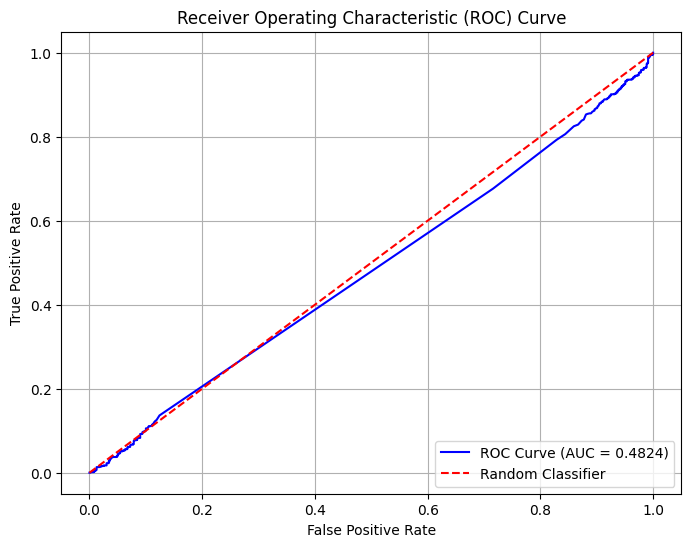

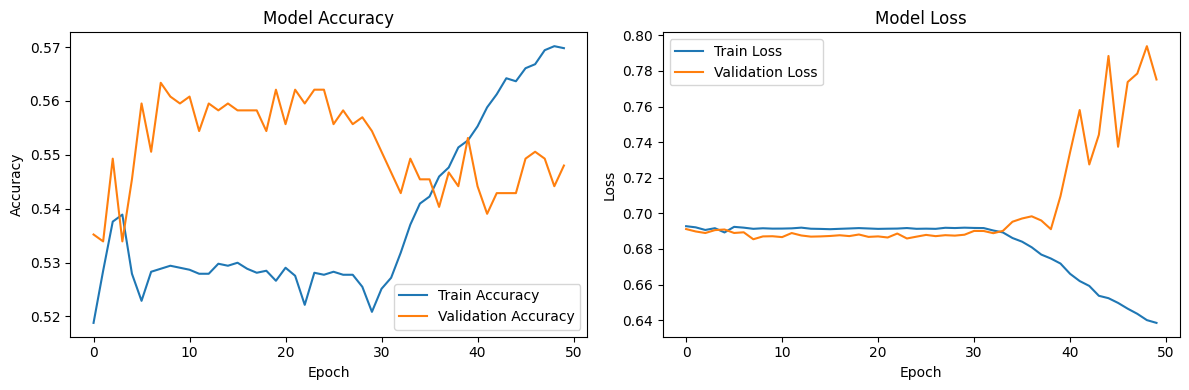

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        # Ensure embeddings and labels are NumPy arrays
        self.embeddings = torch.FloatTensor(np.array(embeddings))

        # Ensure labels are a 1D NumPy array and converted to float
        labels = np.array(labels, dtype=float)
        if labels.ndim == 0:
            labels = labels.reshape(1)

        self.labels = torch.FloatTensor(labels).view(-1, 1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class LSTMGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)

        # Take the last time step
        out = lstm_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)

                # Compute validation accuracy
                predicted = (outputs > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.cpu().numpy()
            predicted = (outputs > 0.5).float().cpu().numpy()

            all_preds.extend(predicted.flatten())
            all_labels.extend(batch_y.cpu().numpy().flatten())
            all_probs.extend(probs.flatten())

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

    # Preprocess text
    white_training['combined_text'] = white_training['note'] + ' ' + white_training['gpt4_summary']
    white_val['combined_text'] = white_val['note'] + ' ' + white_val['gpt4_summary']
    white_test['combined_text'] = white_test['note'] + ' ' + white_test['gpt4_summary']

    white_training['processed_text'] = white_training['combined_text'].apply(preprocess_text)
    white_val['processed_text'] = white_val['combined_text'].apply(preprocess_text)
    white_test['processed_text'] = white_test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(white_training['processed_text'].values, ft_model)
    X_val = create_embeddings(white_val['processed_text'].values, ft_model)
    X_test = create_embeddings(white_test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(white_training['glaucoma'])

    y_train = le.transform(white_training['glaucoma'])
    y_val = le.transform(white_val['glaucoma'])
    y_test = le.transform(white_test['glaucoma'])

    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = LSTMGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_lstm_model.pth')

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Using device: cpu
Data types and shapes:
Train data type: <class 'pandas.core.frame.DataFrame'>
Train 'glaucoma' column type: <class 'pandas.core.series.Series'>
Train 'glaucoma' first few values: 0    yes
1    yes
2     no
3    yes
4    yes
Name: glaucoma, dtype: object
y_train type: <class 'numpy.ndarray'>
y_train shape: (5372,)
y_train first few values: [1 0 1 1 1]
Epoch [1/50]
Train Loss: 0.6930, Train Acc: 0.5073
Val Loss: 0.6902, Val Acc: 0.5455
Epoch [2/50]
Train Loss: 0.6926, Train Acc: 0.5283
Val Loss: 0.6911, Val Acc: 0.5442
Epoch [3/50]
Train Loss: 0.6907, Train Acc: 0.5294
Val Loss: 0.6900, Val Acc: 0.5442
Epoch [4/50]
Train Loss: 0.6890, Train Acc: 0.5393
Val Loss: 0.6898, Val Acc: 0.5455
Epoch [5/50]
Train Loss: 0.6954, Train Acc: 0.5376
Val Loss: 0.6915, Val Acc: 0.5442
Epoch [6/50]
Train Loss: 0.6930, Train Acc: 0.5182
Val Loss: 0.6883, Val Acc: 0.5480
Epoch [7/50]
Train Loss: 0.6925, Train Acc: 0.5214
Val Loss: 0.6917, Val Acc: 0.5467
Epoch [8/50]
Train Loss: 0.6926, T

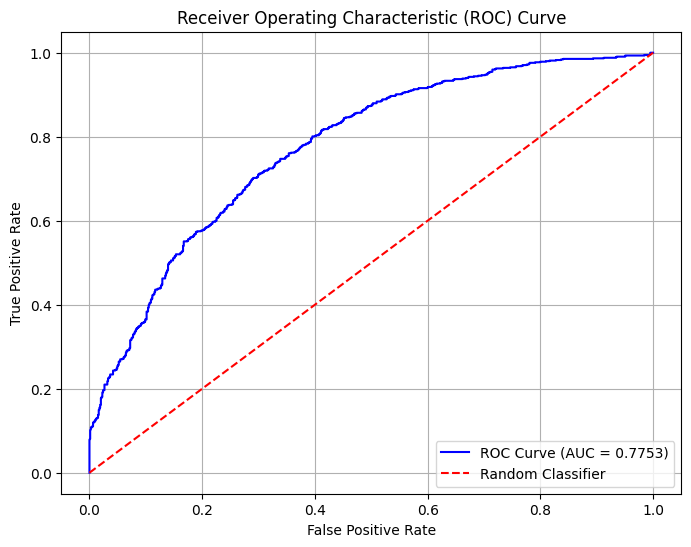

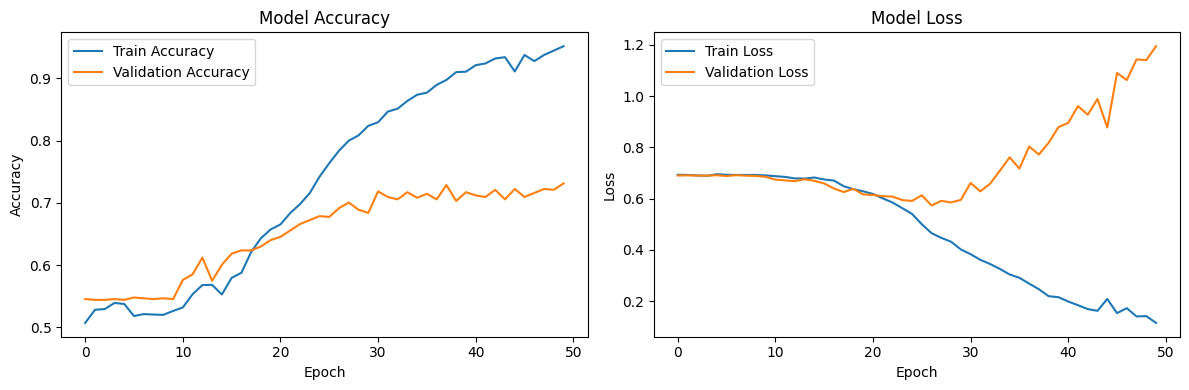

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        # Ensure embeddings and labels are NumPy arrays
        self.embeddings = torch.FloatTensor(np.array(embeddings))

        # Ensure labels are a 1D NumPy array and converted to float
        labels = np.array(labels, dtype=float)
        if labels.ndim == 0:
            labels = labels.reshape(1)

        self.labels = torch.FloatTensor(labels).view(-1, 1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class GRUGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layers
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # GRU forward pass
        gru_out, _ = self.gru(x)

        # Take the last time step
        out = gru_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)

                # Compute validation accuracy
                predicted = (outputs > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.cpu().numpy()
            predicted = (outputs > 0.5).float().cpu().numpy()

            all_preds.extend(predicted.flatten())
            all_labels.extend(batch_y.cpu().numpy().flatten())
            all_probs.extend(probs.flatten())

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Debugging: print out data types and shapes
    print("Data types and shapes:")
    print("Train data type:", type(train))
    print("Train 'glaucoma' column type:", type(train['glaucoma']))
    print("Train 'glaucoma' first few values:", train['glaucoma'].head())

    # Load FastText model
    ft_model = load_fasttext_model()

   # Preprocess text
    white_training['combined_text'] = white_training['note'] + ' ' + white_training['gpt4_summary']
    white_val['combined_text'] = white_val['note'] + ' ' + white_val['gpt4_summary']
    white_test['combined_text'] = white_test['note'] + ' ' + white_test['gpt4_summary']

    white_training['processed_text'] = white_training['combined_text'].apply(preprocess_text)
    white_val['processed_text'] = white_val['combined_text'].apply(preprocess_text)
    white_test['processed_text'] = white_test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(white_training['processed_text'].values, ft_model)
    X_val = create_embeddings(white_val['processed_text'].values, ft_model)
    X_test = create_embeddings(white_test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(white_training['glaucoma'])

    y_train = le.transform(white_training['glaucoma'])
    y_val = le.transform(white_val['glaucoma'])
    y_test = le.transform(white_test['glaucoma'])

    # Debugging: print out label shapes and types
    print("y_train type:", type(y_train))
    print("y_train shape:", y_train.shape)
    print("y_train first few values:", y_train[:5])

    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = GRUGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_gru_model.pth')

if __name__ == "__main__":
    main()

# Black

In [41]:
black = df_group.get_group('black')
black_g = black.groupby('use')
black_training = black_g.get_group('training')
black_test = black_g.get_group('test')
black_val = black_g.get_group('validation')
black_training = black_training.drop('use', axis=1)
black_test = black_test.drop('use', axis=1)
black_val = black_val.drop('use', axis=1)

## Baseline

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load and preprocess data using only GPT4 summary
def load_and_preprocess_data(train, test):
    # Read the CSV file

    # Use GPT4 summary as feature
    X_train = train['gpt4_summary']
    X_test = test['gpt4_summary']
    y_train = train['glaucoma']
    y_test = test['glaucoma']



    return X_train, X_test, y_train, y_test

# Create a machine learning pipeline with TF-IDF and Logistic Regression
def create_classification_pipeline():
    return Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),  # TF-IDF Vectorization
        ('classifier', MultinomialNB())  # Logistic Regression
    ])

# Main function to run the classification
def run_glaucoma_classification(train, test):
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess_data(train, test)


    # Create and train the pipeline
    pipeline = create_classification_pipeline()
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Compute probabilities for AUC
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Compute AUC
    try:
        auc = roc_auc_score(y_test, y_pred_proba)
        print("AUC Score:", auc)
    except ValueError:
        print("AUC calculation failed. Ensure binary classification.")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Plot ROC Curve
    try:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    except Exception as e:
        print("Could not plot ROC curve:", str(e))

    return pipeline

# Run the classification
model = run_glaucoma_classification(black_training, black_test)



Accuracy Score: 0.6754098360655738
AUC Score: 0.7092772888972103

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.10      0.18       109
         yes       0.67      0.99      0.80       196

    accuracy                           0.68       305
   macro avg       0.79      0.55      0.49       305
weighted avg       0.76      0.68      0.58       305


Confusion Matrix:
[[ 11  98]
 [  1 195]]
Could not plot ROC curve: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.


## LSTM

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Using device: cpu
Epoch [1/50]
Train Loss: 0.6581, Train Acc: 0.6183
Val Loss: 0.6517, Val Acc: 0.6478
Epoch [2/50]
Train Loss: 0.6589, Train Acc: 0.6514
Val Loss: 0.6514, Val Acc: 0.6478
Epoch [3/50]
Train Loss: 0.6576, Train Acc: 0.6514
Val Loss: 0.6514, Val Acc: 0.6478
Epoch [4/50]
Train Loss: 0.6458, Train Acc: 0.6514
Val Loss: 0.6541, Val Acc: 0.6478
Epoch [5/50]
Train Loss: 0.6552, Train Acc: 0.6514
Val Loss: 0.6529, Val Acc: 0.6478
Epoch [6/50]
Train Loss: 0.6491, Train Acc: 0.6514
Val Loss: 0.6533, Val Acc: 0.6478
Epoch [7/50]
Train Loss: 0.6431, Train Acc: 0.6514
Val Loss: 0.6562, Val Acc: 0.6478
Epoch [8/50]
Train Loss: 0.6521, Train Acc: 0.6514
Val Loss: 0.6580, Val Acc: 0.6478
Epoch [9/50]
Train Loss: 0.6325, Train Acc: 0.6514
Val Loss: 0.6675, Val Acc: 0.6478
Epoch [10/50]
Train Loss: 0.6440, Train Acc: 0.6495
Val Loss: 0.6649, Val Acc: 0.6478
Epoch [11/50]
Train Loss: 0.6309, Train Acc: 0.6543
Val Loss: 0.7047, Val Acc: 0.6478
Epoch [12/50]
Train Loss: 0.6184, Train Acc: 

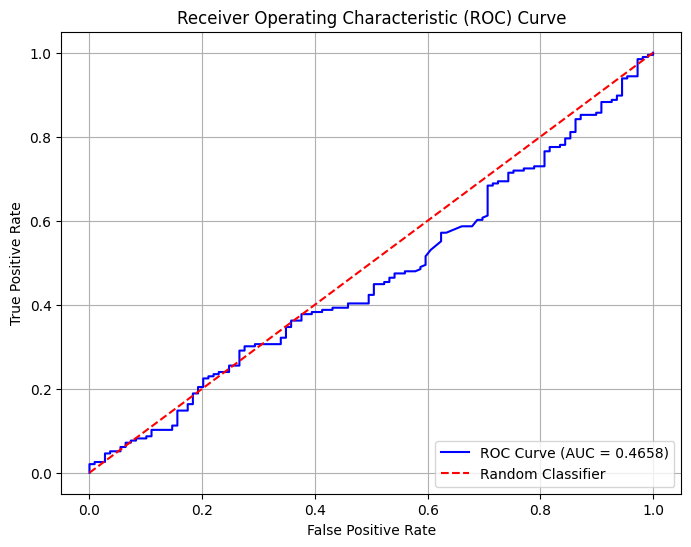

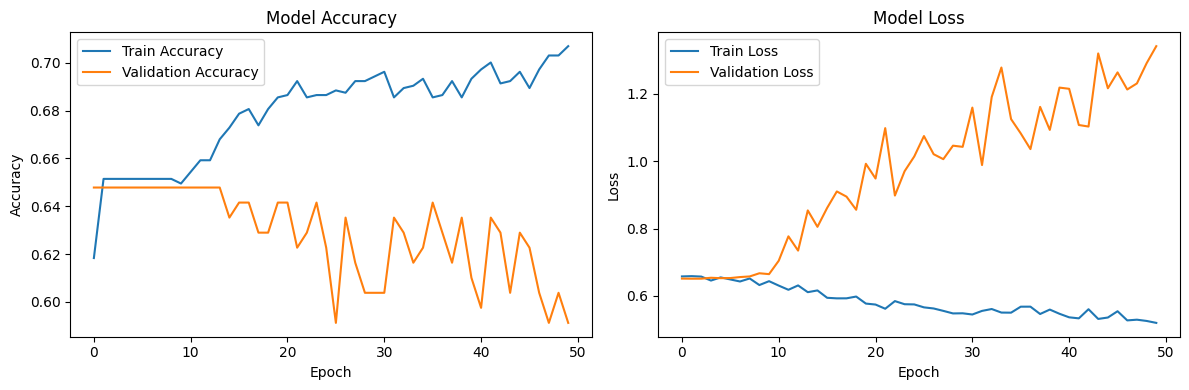

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class LSTMGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # LSTM forward pass
        lstm_out, _ = self.lstm(x)

        # Take the last time step
        out = lstm_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                # Compute validation accuracy
                predicted = (outputs.squeeze() > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.squeeze().cpu().numpy()
            predicted = (probs > 0.5).astype(int)

            all_preds.extend(predicted)
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs)

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

     # Preprocess text
    black_training['combined_text'] = black_training['note'] + ' ' + black_training['gpt4_summary']
    black_val['combined_text'] = black_val['note'] + ' ' + black_val['gpt4_summary']
    black_test['combined_text'] = black_test['note'] + ' ' + black_test['gpt4_summary']

    black_training['processed_text'] = black_training['combined_text'].apply(preprocess_text)
    black_val['processed_text'] = black_val['combined_text'].apply(preprocess_text)
    black_test['processed_text'] = black_test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(black_training['processed_text'].values, ft_model)
    X_val = create_embeddings(black_val['processed_text'].values, ft_model)
    X_test = create_embeddings(black_test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(black_training['glaucoma'])

    y_train = le.transform(black_training['glaucoma'])
    y_val = le.transform(black_val['glaucoma'])
    y_test = le.transform(black_test['glaucoma'])


    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = LSTMGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_lstm_model.pth')

if __name__ == "__main__":
    main()

## GRU

[nltk_data] Downloading package punkt to /home/mustakin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/mustakin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mustakin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mustakin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Using device: cpu
Epoch [1/50]
Train Loss: 0.6540, Train Acc: 0.6514
Val Loss: 0.6534, Val Acc: 0.6478
Epoch [2/50]
Train Loss: 0.6532, Train Acc: 0.6514
Val Loss: 0.6543, Val Acc: 0.6478
Epoch [3/50]
Train Loss: 0.6424, Train Acc: 0.6514
Val Loss: 0.6627, Val Acc: 0.6478
Epoch [4/50]
Train Loss: 0.6392, Train Acc: 0.6514
Val Loss: 0.6604, Val Acc: 0.6478
Epoch [5/50]
Train Loss: 0.6368, Train Acc: 0.6514
Val Loss: 0.6612, Val Acc: 0.6478
Epoch [6/50]
Train Loss: 0.6300, Train Acc: 0.6514
Val Loss: 0.6773, Val Acc: 0.6478
Epoch [7/50]
Train Loss: 0.6319, Train Acc: 0.6573
Val Loss: 0.6972, Val Acc: 0.6415
Epoch [8/50]
Train Loss: 0.6171, Train Acc: 0.6699
Val Loss: 0.7540, Val Acc: 0.6478
Epoch [9/50]
Train Loss: 0.6107, Train Acc: 0.6670
Val Loss: 0.7660, Val Acc: 0.6352
Epoch [10/50]
Train Loss: 0.5877, Train Acc: 0.6777
Val Loss: 0.8040, Val Acc: 0.6352
Epoch [11/50]
Train Loss: 0.5986, Train Acc: 0.6777
Val Loss: 0.8683, Val Acc: 0.6352
Epoch [12/50]
Train Loss: 0.5849, Train Acc: 

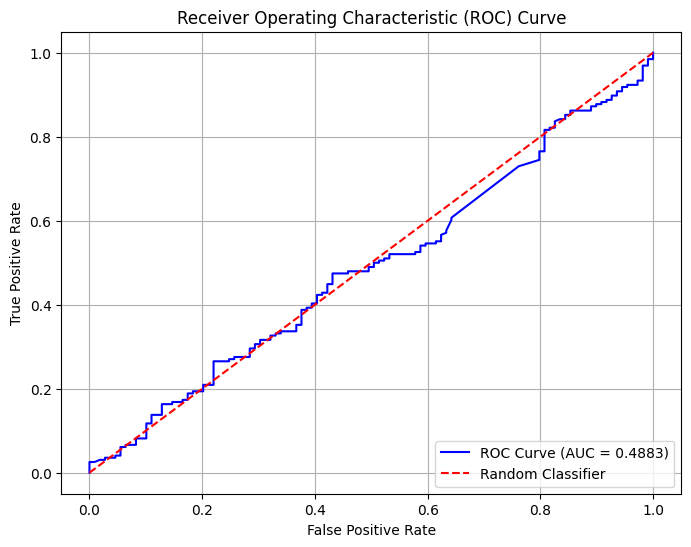

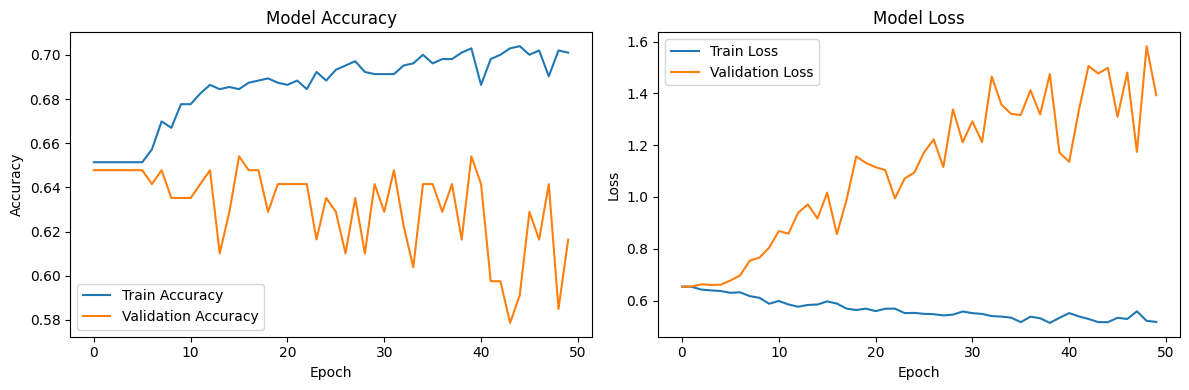

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import fasttext
import fasttext.util
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Detect device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class GlaucomaDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.FloatTensor(embeddings)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

class GRUGlaucomaClassifier(nn.Module):
    def __init__(self, input_size=300, hidden_size=128, num_layers=2, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU layers
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.3
        )

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # GRU forward pass
        gru_out, _ = self.gru(x)

        # Take the last time step
        out = gru_out[:, -1, :]

        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)

        return out

def preprocess_text(text):
    try:
        # Handle NaN or non-string values
        if pd.isna(text):
            return ""
        text = str(text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

def load_fasttext_model():
    try:
        fasttext.util.download_model('en', if_exists='ignore')
        return fasttext.load_model('cc.en.300.bin')
    except Exception as e:
        print(f"Error loading FastText model: {str(e)}")
        raise

def create_embeddings(texts, ft_model, max_length=200):
    embeddings = []

    for text in texts:
        try:
            words = text.split()[:max_length]
            word_embeddings = [ft_model.get_word_vector(word) for word in words]

            # Pad sequences to max_length
            if len(word_embeddings) < max_length:
                padding = [np.zeros(300) for _ in range(max_length - len(word_embeddings))]
                word_embeddings.extend(padding)
            else:
                word_embeddings = word_embeddings[:max_length]

            embeddings.append(word_embeddings)
        except Exception as e:
            print(f"Error creating embedding for text: {str(e)}")
            embeddings.append(np.zeros((max_length, 300)))

    return np.array(embeddings)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    # Training history
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Compute training accuracy
            predicted = (outputs.squeeze() > 0.5).float()
            total_train += batch_y.size(0)
            correct_train += (predicted == batch_y).sum().item()

            total_train_loss += loss.item()

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)

                outputs = model(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                # Compute validation accuracy
                predicted = (outputs.squeeze() > 0.5).float()
                total_val += batch_y.size(0)
                correct_val += (predicted == batch_y).sum().item()

                total_val_loss += loss.item()

        # Compute average losses and accuracies
        train_loss = total_train_loss / len(train_loader)
        val_loss = total_val_loss / len(val_loader)
        train_accuracy = correct_train / total_train
        val_accuracy = correct_val / total_val

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    total_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            total_loss += loss.item()

            # Get probabilities and predictions
            probs = outputs.squeeze().cpu().numpy()
            predicted = (probs > 0.5).astype(int)

            all_preds.extend(predicted)
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs)

    from sklearn.metrics import (
        classification_report,
        confusion_matrix,
        roc_auc_score,
        roc_curve
    )
    import matplotlib.pyplot as plt

    # Calculate metrics
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    print("\nConfusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

    # Calculate AUC
    auc = roc_auc_score(all_labels, all_probs)
    print(f"\nAUC Score: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return total_loss / len(test_loader)

def plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Load FastText model
    ft_model = load_fasttext_model()

     # Preprocess text
    black_training['combined_text'] = black_training['note'] + ' ' + black_training['gpt4_summary']
    black_val['combined_text'] = black_val['note'] + ' ' + black_val['gpt4_summary']
    black_test['combined_text'] = black_test['note'] + ' ' + black_test['gpt4_summary']

    black_training['processed_text'] = black_training['combined_text'].apply(preprocess_text)
    black_val['processed_text'] = black_val['combined_text'].apply(preprocess_text)
    black_test['processed_text'] = black_test['combined_text'].apply(preprocess_text)

    # Create embeddings
    X_train = create_embeddings(black_training['processed_text'].values, ft_model)
    X_val = create_embeddings(black_val['processed_text'].values, ft_model)
    X_test = create_embeddings(black_test['processed_text'].values, ft_model)

    # Prepare labels
    le = LabelEncoder()
    le.fit(black_training['glaucoma'])

    y_train = le.transform(black_training['glaucoma'])
    y_val = le.transform(black_val['glaucoma'])
    y_test = le.transform(black_test['glaucoma'])

    # Create datasets and dataloaders
    train_dataset = GlaucomaDataset(X_train, y_train)
    val_dataset = GlaucomaDataset(X_val, y_val)
    test_dataset = GlaucomaDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Initialize model
    model = GRUGlaucomaClassifier().to(device)

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer
    )

    # Evaluate model
    evaluate_model(model, test_loader, criterion)

    # Plot training history
    plot_training_history(train_losses, val_losses, train_accuracies, val_accuracies)

    # Save model
    torch.save(model.state_dict(), 'glaucoma_gru_model.pth')

if __name__ == "__main__":
    main()